## Time-Domain Schrodinger equation (TDSE)
### Scattering from a 'cliff' potential

In atomic units (a.u.) , the time domain schrodinger equation in 1D is given by

$$
i \, \frac{\partial \psi(x, t)}{\partial t}
= -\frac{1}{2} \frac{\partial^2 \psi(x, t)}{\partial x^2} + V(x, t) \; \psi(x, t)
$$

Note that:
* all distances $x$ are now in units of the Bohr radius $a_0 = 5.29\times 10^{-11} \; \text{m}$
* all energies (kinetic, potential, etc.) are in units of $E_0 = 27.2 \; \text{eV}$
* time $t$ is in units of $\hbar/E_0 = 2.42 \times 10^{-17} \; \text{s}$

#### The problem

Time-evolution of a wavepacket: Given the 'initial' wavefunction $\psi(x, t=0)$ at all $a \leq x \leq b$ describing a quantum mechanical system prepared at $t=0$, we would like to know $\psi(x, t)$ at later times $t > 0$. In particular, study the scattering from a cliff potential.

#### Reducing the TDSE to Initial Value Problem

We discretize the spatial domain $a \leq x \leq b$ to a uniform grid of $N$ points: $(a, a+\Delta x,a+2\Delta x, \cdots, x_{j-1}, x_j, x_{j+1}, \cdots, b-2\Delta x, b-\Delta x, b]$.

At any given grid point $x_j$ in space, we can use the finite difference to approximately calculate the second-order differential operator $\frac{\partial^2 \psi(x, t)}{\partial x^2} |_{x_j}$ on the RHS of the TDSE:

$$
\frac{\partial^2 \psi(x_j, t)}{\partial x^2} \simeq
        \frac{1}{\Delta x^2} \left [ \psi(x_j+\Delta x, t) - 2 \; \psi(x_j, t) + \psi(x_j -\Delta x, t)\right ]
$$

Further compacting the notation by denoting $\psi(x_j, t) \rightarrow \psi_j(t)$, the TDSE can be written down as a system of $N$ ODEs:
$$
\frac{\partial \psi_j(t)}{\partial t} =
    -\frac{i}{2 \Delta x^2} \left [ \psi_{j+1}(t) - 2 \; \psi_j(t) + \psi_{j-1}(t)\right ]  
    + V_j(t) \; \psi_j(t)
$$


#### Integrating the set of ODEs

We need to consider that the TDSE preserves the normalization of the wavefunction. so an ODE solver that preserves the norm should be used. The Leapfrog method has this special property.

To make it suitable for leapfroG integration, we need to separate the wavefunction $\psi_j(t)$ into its real and imaginary parts:
$$
\psi_j(t) = R_j(t) + i \, I_j(t).
$$

Substituion leads to the following set of coupled ODEs:
\begin{eqnarray}
\frac{dR_j}{dt} &=& -\frac{1}{2\Delta x^2}I_{j-1} + \left ( \frac{1}{\Delta x^2} + V_j \right ) I_j
                    - \frac{1}{2 \Delta x^2} I_{j+1} \\
\frac{dI_j}{dt} &=& \frac{1}{2\Delta x^2}R_{j-1} - \left ( \frac{1}{\Delta x^2} + V_j \right ) R_j
                    + \frac{1}{2 \Delta x^2} R_{j+1} \\           
\end{eqnarray}

As discussed in class, the above set of coupled ODEs can be compared to the set of differential equations for a Hamiltonian system and one can think of $R_j$'s as 'generalized coordinates', and $I_j$'s as the 'generalized velocities'. As such, by the same analogy, $R^T R + I^T I$ must be preserved at all times. In fact this is integrand of the wavefunction normalization!

#### Leap-Frog Integration

\begin{eqnarray}
I_j {(t + \Delta t/2)} &=& I_j (t) + \left [ {dI_j}/{dt} \right ]_{R_j(t)} \times \Delta t/2  \\
R_j {(t + \Delta t)} &=& R_j (t) + \left [ dR_j/dt \right ]_{I_j{(t + \Delta t/2)}} \times \Delta t \\
I_j {(t + \Delta t)} &=& I_j {(t + \Delta t/2)} + \left [ dI/dt \right ]_{R_j(t + \Delta t)} \times \Delta t/2
\end{eqnarray}




## Visscher's staggered step algorithm

Visscher's staggered step algorithm is a method to solve the Schrödinger Equation (SE) by splitting the wavefunction into real and imaginary parts, where $\psi = R + iI$. This approach yields a system of two coupled equations:

\begin{align*}
\frac{{dR}}{{dt}} &= HI \\
\frac{{dI}}{{dt}} &= -HR
\end{align*}

Here, $H$ represents the Hamiltonian, which is given by $H = \left(-\frac{1}{{2m}}\right)\nabla^2 + V$.

The discretization of this system, achieved by computing $R$ and $I$ at staggered times, results in:

\begin{align*}
R\left(t + \frac{{1}}{{2}}\Delta t\right) &= R\left(t - \frac{{1}}{{2}}\Delta t\right) + \Delta t \cdot HI(t) \\
I\left(t + \frac{{1}}{{2}}\Delta t\right) &= I\left(t - \frac{{1}}{{2}}\Delta t\right) - \Delta t \cdot HR(t)
\end{align*}

The Laplacian, $\nabla^2 \psi(r,t) = \frac{{\psi(r + \Delta r,t) - 2\psi(r,t) + \psi(r - \Delta r,t)}}{{\Delta r^2}}$, is utilized, employing the standard three-point Laplacian.

This method is explicit, computationally fast, and second-order accurate in $\Delta t$. Defining the probability density as:

\begin{align*}
P(x,t) &= R^2(x,t) + I(x,t + \frac{{1}}{{2}}\Delta t)I(x,t - \frac{{1}}{{2}}\Delta t) \quad &\text{at integer time steps} \\
P(x,t) &= R(x,t + \frac{{1}}{{2}}\Delta t)R(x,t - \frac{{1}}{{2}}\Delta t) + I^2(x,t) \quad &\text{at half-integer time steps}
\end{align*}

This adjustment renders the algorithm unitary, thereby conserving probability.


### STATIC POTENTIAL CASE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

%matplotlib inline

In [2]:
def dIdt(R, Vx, dx):
    #-- Calculate and return dI/dt at all x_j (assume periodic bndry for wavefunction)
    #-- Equation 8.8b (Wang)
    b = 0.5/(dx**2.)

    dydt = b*np.roll(R, 1)
    dydt += -(2*b + Vx)*R
    dydt += b*np.roll(R, -1)

    return dydt

In [3]:
def dRdt(I, Vx, dx):
    #-- Calculate and return dR/dt at all x_j (assume periodic bndry for wavefunction)
    #-- Equation 8.8a (Wang)

    b = 0.5/(dx**2.)

    dydt = -b*np.roll(I, 1)
    dydt += (2*b + Vx)*I
    dydt += -b*np.roll(I, -1)

    return dydt

In [4]:
#-- position expectation value.
def avg_x(x, psi):
    dx = x[1]-x[0]
    xPsi = x*psi
    return np.real(integrate.simps(psi.conjugate()* xPsi, x))


In [5]:
#-- momentum expectation value.
def avg_P(x, R, I):
    # Can be shown that: <p> = \hbar \int (RI' - IR') dx
    dx = x[1] - x[0]

    #-- central difference for derivatives (assume periodic bndry for wavefunction)
    dRdx = (1.0/(12*dx))*(np.roll(R, -2)-8*np.roll(R,-1) +8*np.roll(R,1) - np.roll(R, 2))
    dIdx = (1.0/(12*dx))*(np.roll(I, -2)-8*np.roll(I,-1) +8*np.roll(I,1) - np.roll(I, 2))

    return (integrate.simps(R*dIdx - I*dRdx, x))

#### RECTANGULAR BARRIER POTENTIAL

In [6]:
@np.vectorize
def V(x):
    V0=45000  # atomic units
    w = 1   # width of the rectangular potential
    
    if x >= -w/2 and x < w/2 :
        return V0 
    else:
        return 0.

#### Initial wavepacket at t=0

$$
\psi(x, t=0) = \left ( \frac{1}{\sigma \sqrt{2\pi}} \right )^{1/2} \exp \left [ -(x-x_0)^2 / 4\sigma^2 + i k_0 x \right ]
$$


In [7]:
xa = -2
xb = 2

#-- wavefunction at t=0
sigma = 0.05
x0 = -1
k0 = 400.0

Nx=2000
xt=0.5
xr=-0.5
dx=(xb-xa)/Nx
x=np.linspace(xa,xb,Nx)

Vx = V(x)

psi0 = 1./np.sqrt(sigma * np.sqrt(2*np.pi))* np.exp( -((x-x0)**2.)/(4.*sigma**2.) + 1j*k0*x )
R = np.real(psi0)
I = np.imag(psi0)

print('At t=0, dx = %.6e, k0 = %.2f, <p> = %.3f, <x> = %.2f'%
      (dx, k0, avg_P(x, R, I), avg_x(x, psi0) ))

At t=0, dx = 2.000000e-03, k0 = 400.00, <p> = -394.901, <x> = -1.00


### Plot the initial wave packet

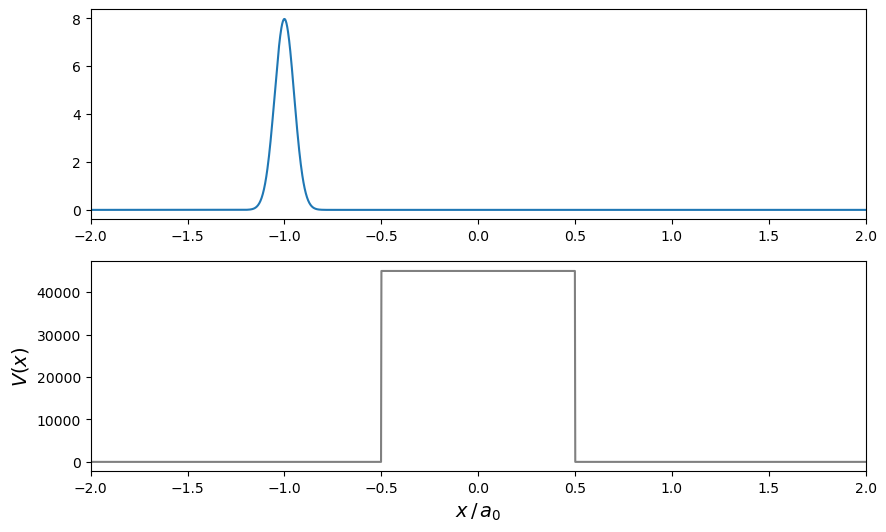

In [8]:
plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
plt.plot(x, np.abs(psi0)**2)
plt.xlim(xa, xb)

plt.subplot(2,1,2)
plt.plot(x, V(x), '-', color='gray')
plt.xlabel(r'$x \, / \, a_0$', fontsize=14)
plt.ylabel(r'$V(x)$', fontsize=14)

plt.xlim(xa, xb)
plt.show()

#### Leap-frog integration

In [9]:
dt = 0.1*(dx**2)
Nt =  15000      # time-steps to integrate over
print('dx = %.4e, dt = %.4e, integrating for %d time=steps'%(dx, dt, Nt))

tfrac = 0.05
Nplots = int(1./tfrac)
psi_t = np.empty((Nplots, len(x)), dtype='complex')

j = 0
for i in range(1, Nt+1):

    I_half = I + dIdt(R, Vx, dx) * (dt/2.)  #-- I(t + delta_t/2)
    R = R + dRdt(I_half, Vx, dx) * dt       #-- R(t + delta_t)
    I = I_half + dIdt(R, Vx, dx) * (dt/2.)  #-- I(t + delta_t)

    if ((i % int(tfrac*Nt)) == 0):
        print('Storing snapshot %2d/%2d of the complex wavefunction '%(j+1, Nplots))
        psi_t[j,:] = R + 1j*I
        j = j+1 #-- prepare for next snapshot

dx = 2.0000e-03, dt = 4.0000e-07, integrating for 15000 time=steps
Storing snapshot  1/20 of the complex wavefunction 
Storing snapshot  2/20 of the complex wavefunction 
Storing snapshot  3/20 of the complex wavefunction 
Storing snapshot  4/20 of the complex wavefunction 
Storing snapshot  5/20 of the complex wavefunction 
Storing snapshot  6/20 of the complex wavefunction 
Storing snapshot  7/20 of the complex wavefunction 
Storing snapshot  8/20 of the complex wavefunction 
Storing snapshot  9/20 of the complex wavefunction 
Storing snapshot 10/20 of the complex wavefunction 
Storing snapshot 11/20 of the complex wavefunction 
Storing snapshot 12/20 of the complex wavefunction 
Storing snapshot 13/20 of the complex wavefunction 
Storing snapshot 14/20 of the complex wavefunction 
Storing snapshot 15/20 of the complex wavefunction 
Storing snapshot 16/20 of the complex wavefunction 
Storing snapshot 17/20 of the complex wavefunction 
Storing snapshot 18/20 of the complex wavefunctio

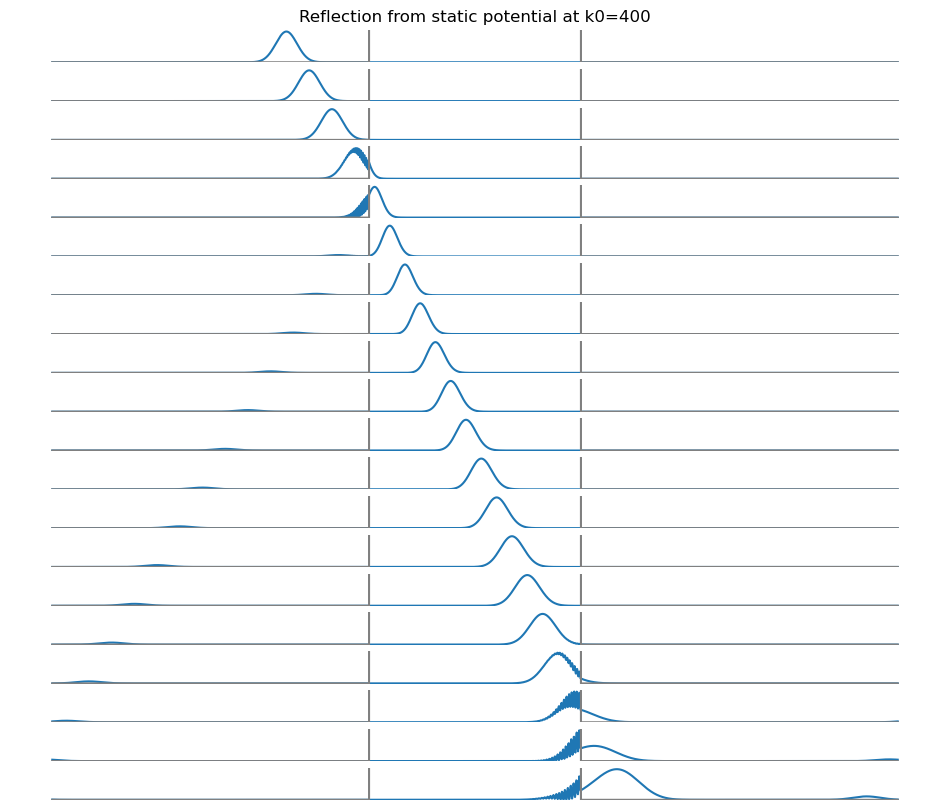

In [10]:
#-- Plot the wavefunctions psi(x, t) recorded at different instances
plt.figure(figsize=(12,10))

for j in range(Nplots):
    ax = plt.subplot(Nplots, 1, j+1)

    #-- remove all axis
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    for spine in ['top', 'right', 'left', 'bottom']:
        ax.spines[spine].set_visible(False)
    ax.set_ylim(-0.02, 1.05*np.max(np.abs(psi_t[j,:])**2))

    #-- set the title for the first subplot
    if (j==0):
        plt.title('Reflection from static potential at k0=400')

    #-- plot |psi(t)|^2
    ax.plot(x, np.abs(psi_t[j,:])**2)

    #-- mark the position of the cliff
    ax.plot(x,V(x), color='gray')


plt.show()

In [11]:
#-- add psi0 to the top of the stack of \psi(t)
psi_t = np.vstack((psi0, psi_t))

for j in range(len(psi_t)):
    norm = integrate.simps(np.abs(psi_t[j,:])**2, x)
    avgX = avg_x(x, np.real(psi_t[j,:]) + 1j*np.imag(psi_t[j,:]))
    avgP = avg_P(x, np.real(psi_t[j,:]), np.imag(psi_t[j,:]))

    print ('%2d \t norm = %.2e <x> = %.3e, <p> = %4.2f'%(j+1, norm, avgX, avgP))

 1 	 norm = 1.00e+00 <x> = -1.000e+00, <p> = -394.90
 2 	 norm = 1.00e+00 <x> = -8.923e-01, <p> = -394.90
 3 	 norm = 1.00e+00 <x> = -7.846e-01, <p> = -394.90
 4 	 norm = 1.00e+00 <x> = -6.769e-01, <p> = -394.86
 5 	 norm = 1.00e+00 <x> = -5.703e-01, <p> = -379.24
 6 	 norm = 1.00e+00 <x> = -4.812e-01, <p> = -252.95
 7 	 norm = 1.00e+00 <x> = -4.166e-01, <p> = -211.70
 8 	 norm = 1.00e+00 <x> = -3.553e-01, <p> = -211.29
 9 	 norm = 1.00e+00 <x> = -2.940e-01, <p> = -211.29
10 	 norm = 1.00e+00 <x> = -2.327e-01, <p> = -211.29
11 	 norm = 1.00e+00 <x> = -1.714e-01, <p> = -211.29
12 	 norm = 1.00e+00 <x> = -1.101e-01, <p> = -211.29
13 	 norm = 1.00e+00 <x> = -4.880e-02, <p> = -211.29
14 	 norm = 1.00e+00 <x> = 1.249e-02, <p> = -211.29
15 	 norm = 1.00e+00 <x> = 7.379e-02, <p> = -211.29
16 	 norm = 1.00e+00 <x> = 1.351e-01, <p> = -211.29
17 	 norm = 1.00e+00 <x> = 1.964e-01, <p> = -211.45
18 	 norm = 1.00e+00 <x> = 2.585e-01, <p> = -215.87
19 	 norm = 9.99e-01 <x> = 3.571e-01, <p> = -240.83

In [12]:
# Define a function to calculate the current density
def current_density(psi, x, x_ref):
    # Calculate the complex conjugate of psi
    ax = psi
    # Compute the gradient of psi with respect to x
    bx = np.gradient(psi, x)
    # Find the index of x closest to x_ref
    idx = np.argmin(np.abs(x - x_ref))
    # Calculate the current density using the given formula
    j = 0.5 * np.imag(np.conj(ax[idx]) * bx[idx] - ax[idx] * np.conj(bx[idx]))
    return j

# Initialize empty lists to store the current densities for transmission and reflection
j_trans = []
j_refl = []

# Loop through the snapshots of the wavefunction
for i in range(Nplots + 1):
    # Calculate the current density for transmission and reflection at each snapshot
    j_trans.append(current_density(psi_t[i, :], x, xt))
    j_refl.append(current_density(psi_t[i, :], x, xr))
    
# Create a list of time points
t = [i * dt for i in range(Nt + 1)]
# Select only the time points corresponding to the desired fraction of total time
t1 = [t[i] for i in range(len(t)) if (i % int(tfrac * Nt)) == 0]

# Integrate the current density over time to calculate transmission probability
transmission_probability = integrate.simps(j_trans, t1)
# Calculate reflection probability
reflection_probability = 1 - transmission_probability

# Print the probabilities
print("Transmission Probability:", transmission_probability)
print("Reflection Probability:", reflection_probability)
print("Total Probability:", transmission_probability + reflection_probability)


Transmission Probability: 0.809504313652426
Reflection Probability: 0.19049568634757397
Total Probability: 1.0


### TIME EVOLUTION OF WAVE PACKET ON HITTING THE STATIC RECTANGULAR POTENTIAL WITH DIFFERENT VALUES OF K0

At t=0, dx = 2.000000e-03, k0 = 300.00, <p> = -298.743, <x> = -1.00


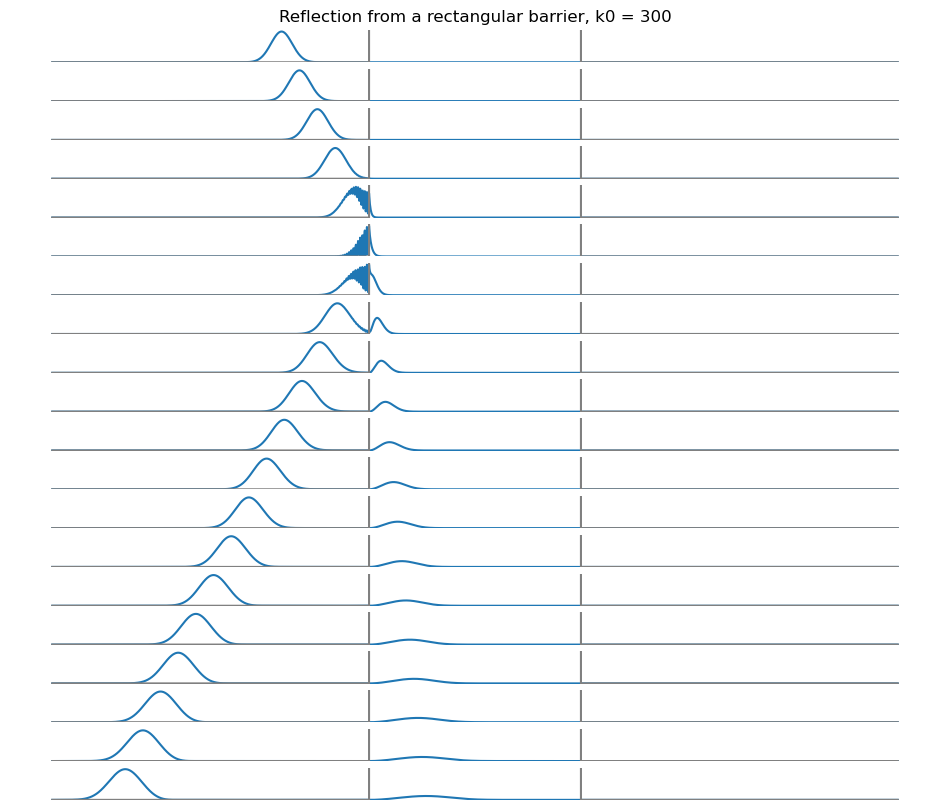

At t=0, dx = 2.000000e-03, k0 = 400.00, <p> = -394.901, <x> = -1.00


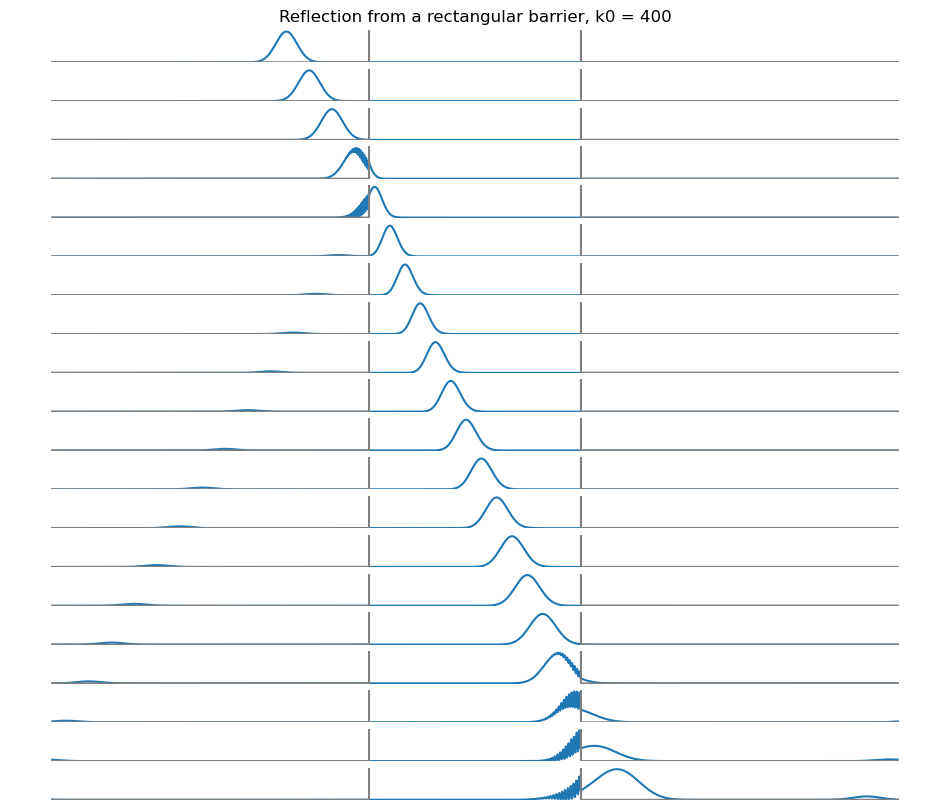

At t=0, dx = 2.000000e-03, k0 = 500.00, <p> = -485.126, <x> = -1.00


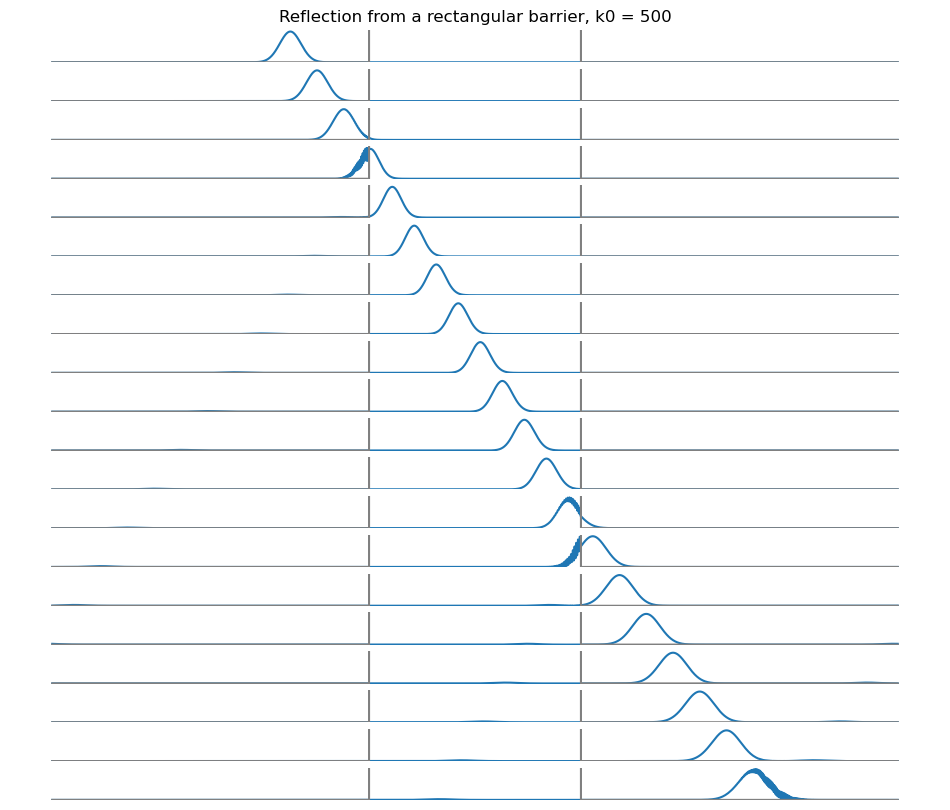

At t=0, dx = 2.000000e-03, k0 = 600.00, <p> = -564.927, <x> = -1.00


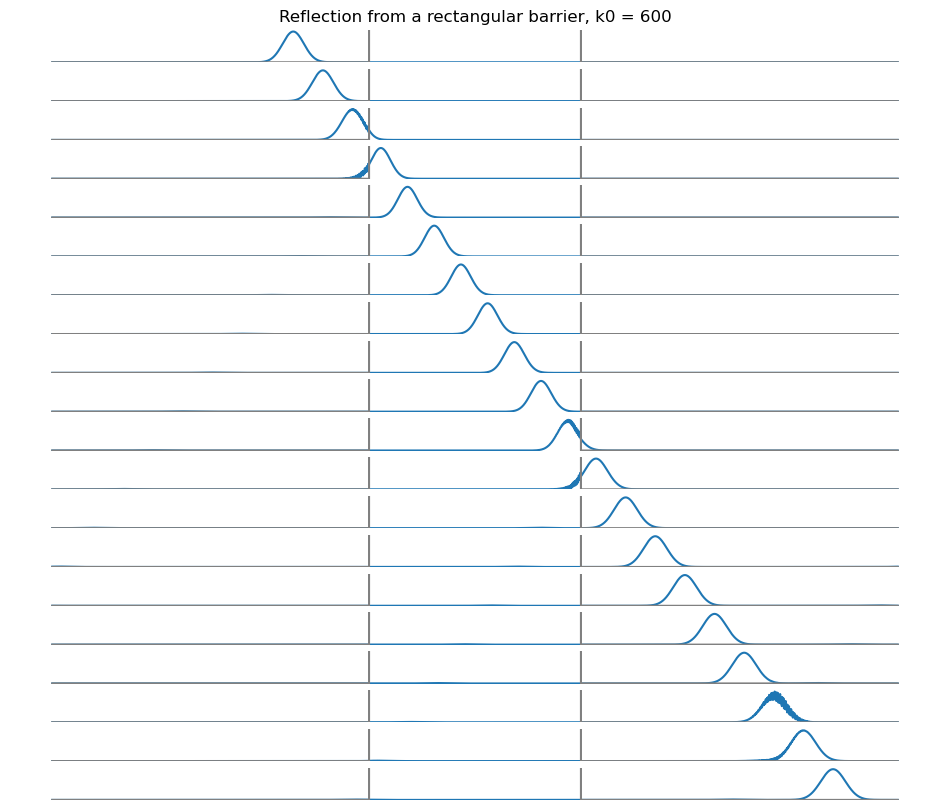

At t=0, dx = 2.000000e-03, k0 = 700.00, <p> = -628.816, <x> = -1.00


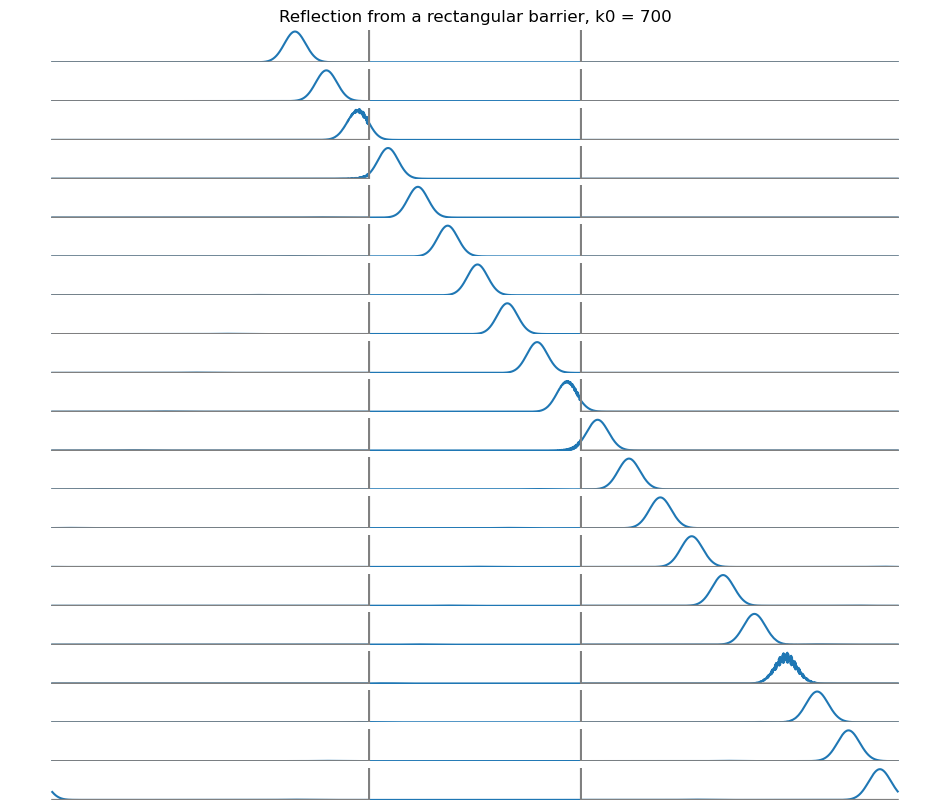

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

def dIdt(R, Vx, dx):
    # Calculate and return dI/dt at all x_j (assume periodic boundary for wavefunction)
    # Equation 8.8b (Wang)
    b = 0.5 / (dx ** 2.)

    dydt = b * np.roll(R, 1)
    dydt += -(2 * b + Vx) * R
    dydt += b * np.roll(R, -1)

    return dydt

def dRdt(I, Vx, dx):
    # Calculate and return dR/dt at all x_j (assume periodic boundary for wavefunction)
    # Equation 8.8a (Wang)

    b = 0.5 / (dx ** 2.)

    dydt = -b * np.roll(I, 1)
    dydt += (2 * b + Vx) * I
    dydt += -b * np.roll(I, -1)

    return dydt

# Position expectation value
def avg_x(x, psi):
    dx = x[1] - x[0]
    xPsi = x * psi
    return np.real(integrate.simps(psi.conjugate() * xPsi, x))

# Momentum expectation value
def avg_P(x, R, I):
    dx = x[1] - x[0]

    # Central difference for derivatives (assume periodic boundary for wavefunction)
    dRdx = (1.0 / (12 * dx)) * (np.roll(R, -2) - 8 * np.roll(R, -1) + 8 * np.roll(R, 1) - np.roll(R, 2))
    dIdx = (1.0 / (12 * dx)) * (np.roll(I, -2) - 8 * np.roll(I, -1) + 8 * np.roll(I, 1) - np.roll(I, 2))

    return integrate.simps(R * dIdx - I * dRdx, x)

def V(x):
    V0 = 4.5 * 10 ** 4  # atomic units
    w = 1  # width of the rectangular potential
    
    return np.where(np.logical_and(x >= -w / 2, x < w / 2), V0, 0)

xa = -2
xb = 2

# Initial parameters
sigma = 0.05
x0 = -1
k_values = [300, 400, 500, 600, 700]  # Different k0 values
Nx = 2000
dx = (xb - xa) / Nx
x = np.linspace(xa, xb, Nx)

# Simulation loop for different k0 values
for k0 in k_values:
    psi0 = 1. / np.sqrt(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - x0) ** 2. / (4. * sigma ** 2.) + 1j * k0 * x)
    R = np.real(psi0)
    I = np.imag(psi0)

    print('At t=0, dx = %.6e, k0 = %.2f, <p> = %.3f, <x> = %.2f' %
          (dx, k0, avg_P(x, R, I), avg_x(x, psi0)))

    dt = 0.1 * (dx ** 2)
    Nt = 15000  # time-steps to integrate over
    tfrac = 0.05
    Nplots = int(1. / tfrac)
    psi_t = np.empty((Nplots, len(x)), dtype='complex')

    j = 0
    ### STAGGERED STEP
    for i in range(1, Nt+1):
        # Update R at t + (1/2) * dt
        R_half = R + dRdt(I, Vx, dx) * (dt/2.)

        # Update I at t + (1/2) * dt
        I_half = I + dIdt(R, Vx, dx) * (dt/2.)

        # Update R at t + dt
        R = R + dRdt(I_half, Vx, dx) * dt

        # Update I at t + dt
        I = I + dIdt(R_half, Vx, dx) * dt

        if (i % int(tfrac * Nt)) == 0:
            psi_t[j, :] = R + 1j * I
            j = j + 1

    # Plotting
    plt.figure(figsize=(12, 10))

    for j in range(Nplots):
        ax = plt.subplot(Nplots, 1, j + 1)

        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        for spine in ['top', 'right', 'left', 'bottom']:
            ax.spines[spine].set_visible(False)
        ax.set_ylim(-0.02, 1.05 * np.max(np.abs(psi_t[j, :]) ** 2))

        if j == 0:
            plt.title('Reflection from a rectangular barrier, k0 = {}'.format(k0))

        ax.plot(x, np.abs(psi_t[j, :]) ** 2)

        ax.plot(x, V(x), '-', color='gray')

    plt.show()


### TIME VARRYING POTENTIAL

## K0=250

In [14]:
@np.vectorize
def V(x,t):
    vb=0.00001
    xv=vb*t
    w=0.02
    V0=45000
    if abs(x-xv)<w/2:
        return V0
    else:
        return 0

In [15]:
xa = -2
xb = 2

#-- wavefunction at t=0
sigma = 0.05
x0 = -1
k0 = 250.0

Nx=2000
xt=0.5
xr=-0.5
dx=(xb-xa)/Nx
x=np.linspace(xa,xb,Nx)

Vx = V(x,18000)

psi0 = 1./np.sqrt(sigma * np.sqrt(2*np.pi))* np.exp( -((x-x0)**2.)/(4.*sigma**2.) + 1j*k0*x )
R = np.real(psi0)
I = np.imag(psi0)

print('At t=0, dx = %.6e, k0 = %.2f, <p> = %.3f, <x> = %.2f'%
      (dx, k0, avg_P(x, R, I), avg_x(x, psi0) ))

At t=0, dx = 2.000000e-03, k0 = 250.00, <p> = -249.486, <x> = -1.00


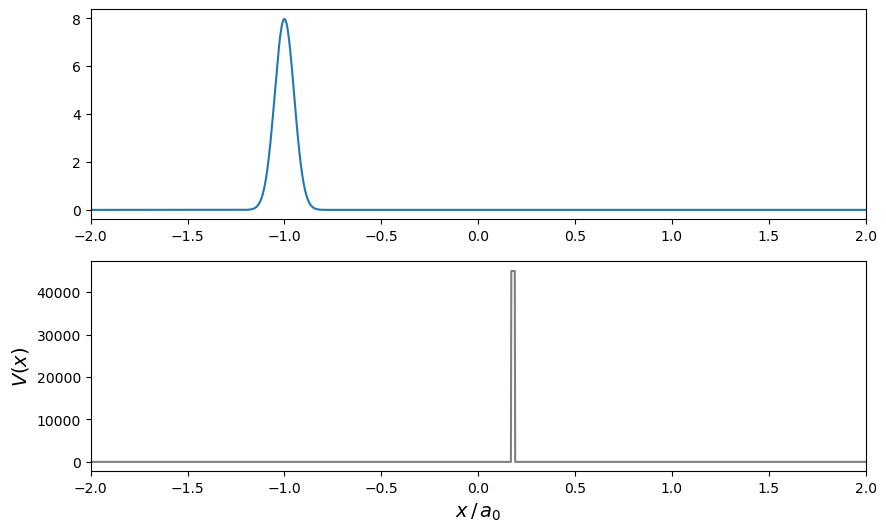

In [16]:
plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
plt.plot(x, np.abs(psi0)**2)
plt.xlim(xa, xb)

plt.subplot(2,1,2)
plt.plot(x, Vx, '-', color='gray')
plt.xlabel(r'$x \, / \, a_0$', fontsize=14)
plt.ylabel(r'$V(x)$', fontsize=14)

plt.xlim(xa, xb)
plt.show()

#### PLOTTING RECTANGULAR POTENTIAL FOR DIFFERENT TIMES

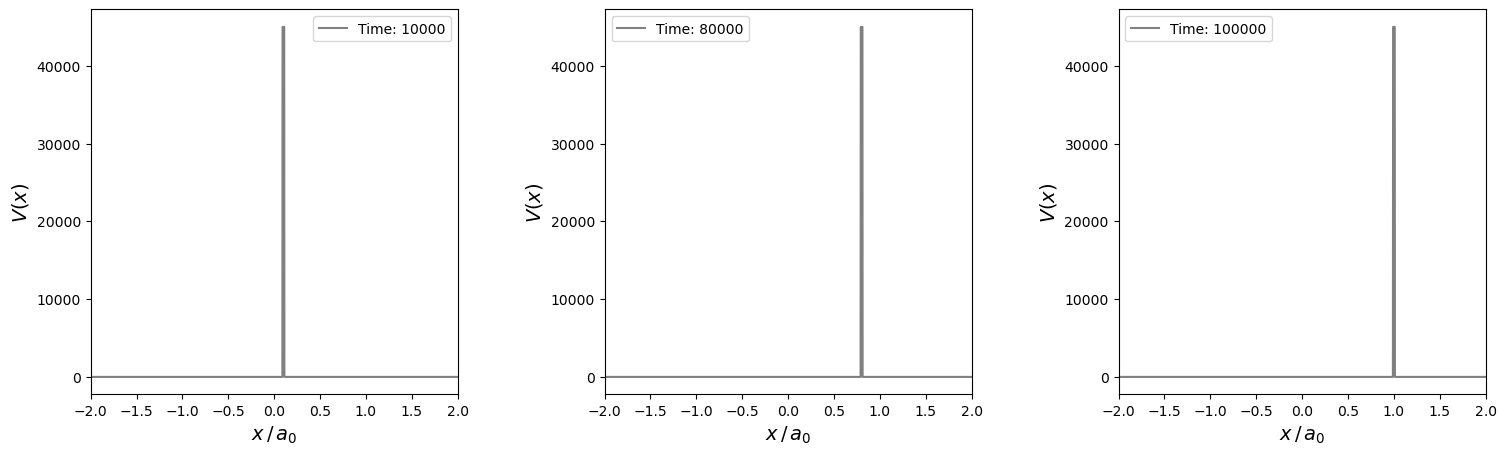

In [17]:
# Different time values
times = [10000, 80000, 100000]  # Add your desired time values here

# Plotting for different time values
fig, axes = plt.subplots(1, len(times), figsize=(18, 5))

for ax, t in zip(axes, times):
    Vx = V(x, t)

    psi0 = 1. / np.sqrt(sigma * np.sqrt(2 * np.pi)) * np.exp(-((x - x0) ** 2.) / (4. * sigma ** 2.) + 1j * k0 * x)

    ax.plot(x, Vx, '-', color='gray', label=f'Time: {t}')
    ax.set_xlabel(r'$x \, / \, a_0$', fontsize=14)
    ax.set_ylabel(r'$V(x)$', fontsize=14)
    ax.set_xlim(xa, xb)
    ax.legend()

plt.subplots_adjust(wspace=0.4)  # Adjust horizontal space between subplots
plt.show()

In [18]:
dt = 0.1*(dx**2)
Nt =  18000      # time-steps to integrate over
print('dx = %.4e, dt = %.4e, integrating for %d time=steps'%(dx, dt, Nt))

tfrac = 0.05
Nplots = int(1./tfrac)
psi_t = np.empty((Nplots, len(x)), dtype='complex')

j = 0
Vxs=[V(x,0)]
for i in range(1, Nt+1):

    I_half = I + dIdt(R, Vx, dx) * (dt/2.)  #-- I(t + delta_t/2)
    R = R + dRdt(I_half, Vx, dx) * dt       #-- R(t + delta_t)
    I = I_half + dIdt(R, Vx, dx) * (dt/2.)  #-- I(t + delta_t)
    Vx=V(x,i)
   
    if ((i % int(tfrac*Nt)) == 0):
        print('Storing snapshot %2d/%2d of the complex wavefunction '%(j+1, Nplots))
        psi_t[j,:] = R + 1j*I
        Vxs.append(Vx)
        j = j+1 #-- prepare for next snapshot

dx = 2.0000e-03, dt = 4.0000e-07, integrating for 18000 time=steps
Storing snapshot  1/20 of the complex wavefunction 
Storing snapshot  2/20 of the complex wavefunction 
Storing snapshot  3/20 of the complex wavefunction 
Storing snapshot  4/20 of the complex wavefunction 
Storing snapshot  5/20 of the complex wavefunction 
Storing snapshot  6/20 of the complex wavefunction 
Storing snapshot  7/20 of the complex wavefunction 
Storing snapshot  8/20 of the complex wavefunction 
Storing snapshot  9/20 of the complex wavefunction 
Storing snapshot 10/20 of the complex wavefunction 
Storing snapshot 11/20 of the complex wavefunction 
Storing snapshot 12/20 of the complex wavefunction 
Storing snapshot 13/20 of the complex wavefunction 
Storing snapshot 14/20 of the complex wavefunction 
Storing snapshot 15/20 of the complex wavefunction 
Storing snapshot 16/20 of the complex wavefunction 
Storing snapshot 17/20 of the complex wavefunction 
Storing snapshot 18/20 of the complex wavefunctio

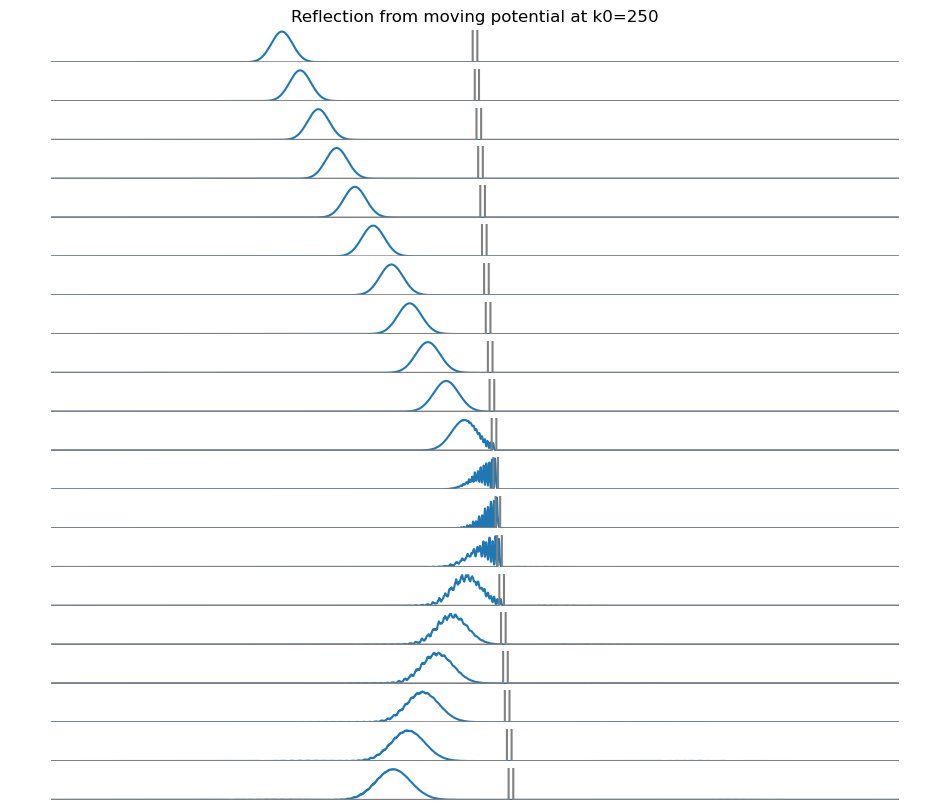

In [19]:
#-- Plot the wavefunctions psi(x, t) recorded at different instances
plt.figure(figsize=(12,10))

for j in range(Nplots):
    ax = plt.subplot(Nplots, 1, j+1)

    #-- remove all axis
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    for spine in ['top', 'right', 'left', 'bottom']:
        ax.spines[spine].set_visible(False)
    ax.set_ylim(-0.02, 1.05*np.max(np.abs(psi_t[j,:])**2))
    
    #-- set the title for the first subplot
    if (j==0):
        plt.title('Reflection from moving potential at k0=250')
        
    #-- plot |psi(t)|^2
    ax.plot(x, np.abs(psi_t[j,:])**2)

    #-- mark the position of the cliff
    ax.plot(x,Vxs[j], color='gray')
    


plt.show()

In [20]:
#-- add psi0 to the top of the stack of \psi(t)
psi_t = np.vstack((psi0, psi_t))

for j in range(len(psi_t)):
    norm = integrate.simps(np.abs(psi_t[j,:])**2, x)
    avgX = avg_x(x, np.real(psi_t[j,:]) + 1j*np.imag(psi_t[j,:]))
    avgP = avg_P(x, np.real(psi_t[j,:]), np.imag(psi_t[j,:]))

    print ('%2d \t norm = %.2e <x> = %.3e, <p> = %4.2f'%(j+1, norm, avgX, avgP))

 1 	 norm = 1.00e+00 <x> = -1.000e+00, <p> = -249.49
 2 	 norm = 1.00e+00 <x> = -9.136e-01, <p> = -249.49
 3 	 norm = 1.00e+00 <x> = -8.273e-01, <p> = -249.49
 4 	 norm = 1.00e+00 <x> = -7.409e-01, <p> = -249.49
 5 	 norm = 1.00e+00 <x> = -6.545e-01, <p> = -249.49
 6 	 norm = 1.00e+00 <x> = -5.682e-01, <p> = -249.49
 7 	 norm = 1.00e+00 <x> = -4.818e-01, <p> = -249.49
 8 	 norm = 1.00e+00 <x> = -3.955e-01, <p> = -249.49
 9 	 norm = 1.00e+00 <x> = -3.091e-01, <p> = -249.49
10 	 norm = 1.00e+00 <x> = -2.227e-01, <p> = -249.49
11 	 norm = 1.00e+00 <x> = -1.364e-01, <p> = -249.44
12 	 norm = 1.00e+00 <x> = -5.035e-02, <p> = -245.03
13 	 norm = 1.00e+00 <x> = 2.702e-02, <p> = -182.92
14 	 norm = 9.98e-01 <x> = 5.901e-02, <p> = 10.56
15 	 norm = 1.00e+00 <x> = 2.609e-02, <p> = 156.89
16 	 norm = 1.00e+00 <x> = -3.750e-02, <p> = 193.42
17 	 norm = 1.00e+00 <x> = -1.061e-01, <p> = 196.52
18 	 norm = 1.00e+00 <x> = -1.751e-01, <p> = 196.65
19 	 norm = 1.00e+00 <x> = -2.441e-01, <p> = 196.65
20 

In [21]:
def current_density(psi, x, x_ref):
    ax = psi
    bx = np.gradient(psi, x)
    idx = np.argmin(np.abs(x - x_ref))
    j = 0.5 * np.imag(np.conj(ax[idx]) * bx[idx] - ax[idx] * np.conj(bx[idx]))
    return j

j_trans = []
j_refl = []

for i in range(0,Nplots + 1):
    j_trans.append(current_density(psi_t[i, :], x, xt))
    j_refl.append(current_density(psi_t[i, :], x, xr))
    
t = [i * dt for i in range(Nt + 1)]
t1 = [t[i] for i in range(len(t)) if (i % int(tfrac * Nt)) == 0]

transmission_probability = integrate.simps(j_trans, t1)
reflection_probability = 1 - transmission_probability

print("Transmission Probability:", transmission_probability)
print("Reflection Probability:", reflection_probability)
print("Total Probability:", transmission_probability + reflection_probability)

Transmission Probability: 0.01134692565557372
Reflection Probability: 0.9886530743444263
Total Probability: 1.0


## K0=550

At t=0, dx = 2.000000e-03, k0 = 550.00, <p> = -526.655, <x> = -1.00
dx = 2.0000e-03, dt = 4.0000e-07, integrating for 18000 time=steps
Storing snapshot  1/20 of the complex wavefunction 
Storing snapshot  2/20 of the complex wavefunction 
Storing snapshot  3/20 of the complex wavefunction 
Storing snapshot  4/20 of the complex wavefunction 
Storing snapshot  5/20 of the complex wavefunction 
Storing snapshot  6/20 of the complex wavefunction 
Storing snapshot  7/20 of the complex wavefunction 
Storing snapshot  8/20 of the complex wavefunction 
Storing snapshot  9/20 of the complex wavefunction 
Storing snapshot 10/20 of the complex wavefunction 
Storing snapshot 11/20 of the complex wavefunction 
Storing snapshot 12/20 of the complex wavefunction 
Storing snapshot 13/20 of the complex wavefunction 
Storing snapshot 14/20 of the complex wavefunction 
Storing snapshot 15/20 of the complex wavefunction 
Storing snapshot 16/20 of the complex wavefunction 
Storing snapshot 17/20 of the com

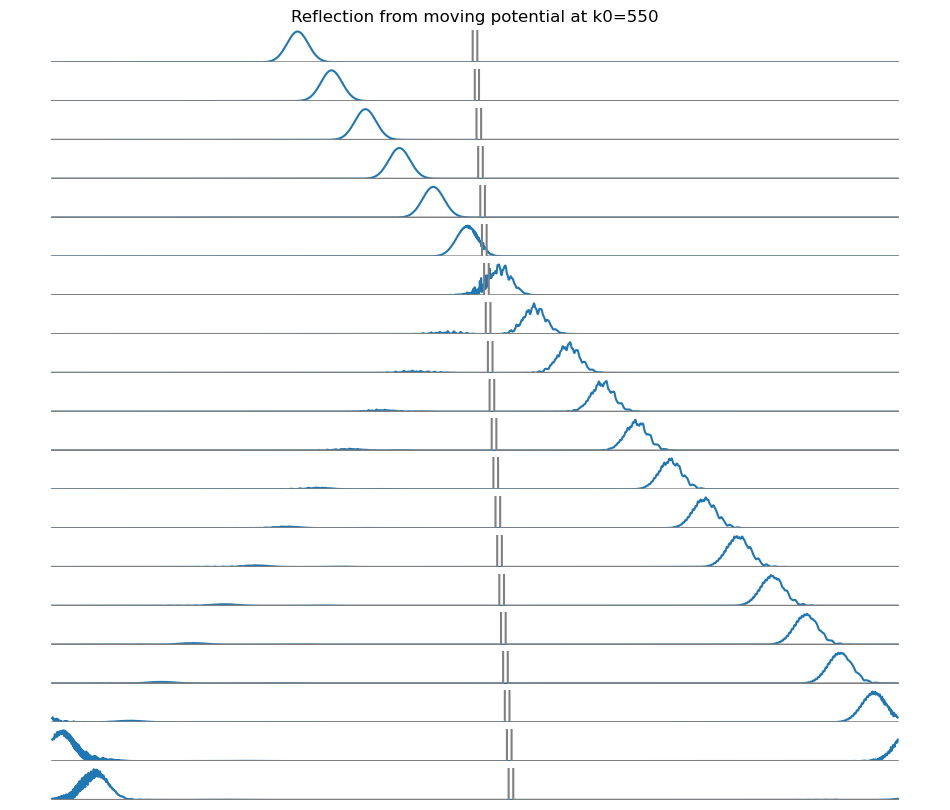

In [22]:
xa = -2
xb = 2

#-- wavefunction at t=0
sigma = 0.05
x0 = -1
k0 = 550.0

Nx=2000
xt=0.5
xr=-0.5
dx=(xb-xa)/Nx
x=np.linspace(xa,xb,Nx)

Vx = V(x,18000)

psi0 = 1./np.sqrt(sigma * np.sqrt(2*np.pi))* np.exp( -((x-x0)**2.)/(4.*sigma**2.) + 1j*k0*x )
R = np.real(psi0)
I = np.imag(psi0)

print('At t=0, dx = %.6e, k0 = %.2f, <p> = %.3f, <x> = %.2f'%
      (dx, k0, avg_P(x, R, I), avg_x(x, psi0) ))
dt = 0.1*(dx**2)
Nt =  18000      # time-steps to integrate over
print('dx = %.4e, dt = %.4e, integrating for %d time=steps'%(dx, dt, Nt))

tfrac = 0.05
Nplots = int(1./tfrac)
psi_t = np.empty((Nplots, len(x)), dtype='complex')

j = 0
Vxs=[V(x,0)]
for i in range(1, Nt+1):

    I_half = I + dIdt(R, Vx, dx) * (dt/2.)  #-- I(t + delta_t/2)
    R = R + dRdt(I_half, Vx, dx) * dt       #-- R(t + delta_t)
    I = I_half + dIdt(R, Vx, dx) * (dt/2.)  #-- I(t + delta_t)
    Vx=V(x,i)
    #psi_t[j,:] = R + 1j*I
   
    if ((i % int(tfrac*Nt)) == 0):
        print('Storing snapshot %2d/%2d of the complex wavefunction '%(j+1, Nplots))
        psi_t[j,:] = R + 1j*I
        Vxs.append(Vx)
        j = j+1 #-- prepare for next snapshot
        
#-- Plot the wavefunctions psi(x, t) recorded at different instances
plt.figure(figsize=(12,10))

for j in range(Nplots):
    ax = plt.subplot(Nplots, 1, j+1)

    #-- remove all axis
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    for spine in ['top', 'right', 'left', 'bottom']:
        ax.spines[spine].set_visible(False)
    ax.set_ylim(-0.02, 1.05*np.max(np.abs(psi_t[j,:])**2))
    
    #-- set the title for the first subplot
    if (j==0):
        plt.title('Reflection from moving potential at k0=550')
        
    #-- plot |psi(t)|^2
    ax.plot(x, np.abs(psi_t[j,:])**2)

    #-- mark the position of the cliff
    ax.plot(x,Vxs[j], color='gray')
   


plt.show()

In [23]:
#-- add psi0 to the top of the stack of \psi(t)
psi_t = np.vstack((psi0, psi_t))

for j in range(len(psi_t)):
    norm = integrate.simps(np.abs(psi_t[j,:])**2, x)
    avgX = avg_x(x, np.real(psi_t[j,:]) + 1j*np.imag(psi_t[j,:]))
    avgP = avg_P(x, np.real(psi_t[j,:]), np.imag(psi_t[j,:]))

    print ('%2d \t norm = %.2e <x> = %.3e, <p> = %4.2f'%(j+1, norm, avgX, avgP))

 1 	 norm = 1.00e+00 <x> = -1.000e+00, <p> = -526.66
 2 	 norm = 1.00e+00 <x> = -8.394e-01, <p> = -526.66
 3 	 norm = 1.00e+00 <x> = -6.789e-01, <p> = -526.66
 4 	 norm = 1.00e+00 <x> = -5.183e-01, <p> = -526.66
 5 	 norm = 1.00e+00 <x> = -3.577e-01, <p> = -526.66
 6 	 norm = 1.00e+00 <x> = -1.971e-01, <p> = -526.66
 7 	 norm = 1.00e+00 <x> = -3.674e-02, <p> = -521.10
 8 	 norm = 9.99e-01 <x> = 1.136e-01, <p> = -465.56
 9 	 norm = 1.00e+00 <x> = 2.549e-01, <p> = -463.88
10 	 norm = 1.00e+00 <x> = 3.960e-01, <p> = -463.88
11 	 norm = 1.00e+00 <x> = 5.371e-01, <p> = -463.88
12 	 norm = 1.00e+00 <x> = 6.783e-01, <p> = -463.88
13 	 norm = 1.00e+00 <x> = 8.194e-01, <p> = -463.88
14 	 norm = 1.00e+00 <x> = 9.605e-01, <p> = -463.88
15 	 norm = 1.00e+00 <x> = 1.102e+00, <p> = -463.88
16 	 norm = 1.00e+00 <x> = 1.243e+00, <p> = -463.88
17 	 norm = 1.00e+00 <x> = 1.384e+00, <p> = -463.88
18 	 norm = 1.00e+00 <x> = 1.524e+00, <p> = -463.87
19 	 norm = 9.98e-01 <x> = 1.563e+00, <p> = -462.83
20 	 

In [24]:
def current_density(psi, x, x_ref):
    ax = psi
    bx = np.gradient(psi, x)
    idx = np.argmin(np.abs(x - x_ref))
    j = 0.5 * np.imag(np.conj(ax[idx]) * bx[idx] - ax[idx] * np.conj(bx[idx]))
    return j

j_trans = []
j_refl = []

for i in range(0,Nplots + 1):
    j_trans.append(current_density(psi_t[i, :], x, xt))
    j_refl.append(current_density(psi_t[i, :], x, xr))
    
t = [i * dt for i in range(Nt + 1)]
t1 = [t[i] for i in range(len(t)) if (i % int(tfrac * Nt)) == 0]

transmission_probability = integrate.simps(j_trans, t1)
reflection_probability = 1 - transmission_probability

print("Transmission Probability:", transmission_probability)
print("Reflection Probability:", reflection_probability)
print("Total Probability:", transmission_probability + reflection_probability)

Transmission Probability: 0.898540563692887
Reflection Probability: 0.10145943630711296
Total Probability: 1.0


### K0=750

At t=0, dx = 2.000000e-03, k0 = 750.00, <p> = -652.945, <x> = -1.00
dx = 2.0000e-03, dt = 4.0000e-07, integrating for 18000 time=steps
Storing snapshot  1/20 of the complex wavefunction 
Storing snapshot  2/20 of the complex wavefunction 
Storing snapshot  3/20 of the complex wavefunction 
Storing snapshot  4/20 of the complex wavefunction 
Storing snapshot  5/20 of the complex wavefunction 
Storing snapshot  6/20 of the complex wavefunction 
Storing snapshot  7/20 of the complex wavefunction 
Storing snapshot  8/20 of the complex wavefunction 
Storing snapshot  9/20 of the complex wavefunction 
Storing snapshot 10/20 of the complex wavefunction 
Storing snapshot 11/20 of the complex wavefunction 
Storing snapshot 12/20 of the complex wavefunction 
Storing snapshot 13/20 of the complex wavefunction 
Storing snapshot 14/20 of the complex wavefunction 
Storing snapshot 15/20 of the complex wavefunction 
Storing snapshot 16/20 of the complex wavefunction 
Storing snapshot 17/20 of the com

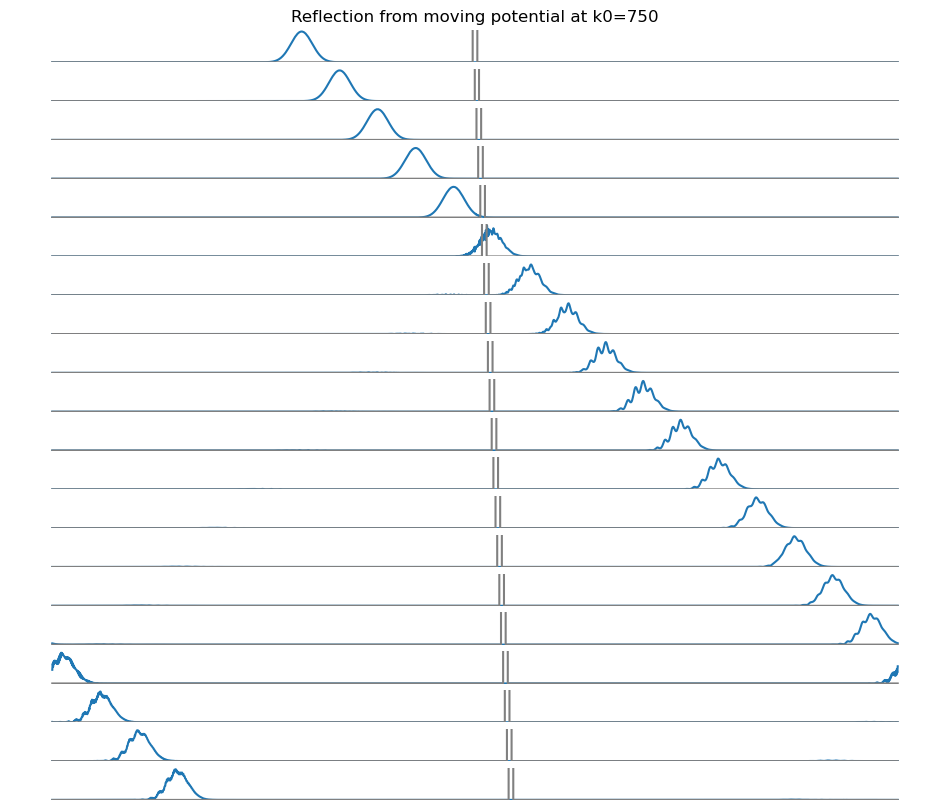

In [25]:
xa = -2
xb = 2

#-- wavefunction at t=0
sigma = 0.05
x0 = -1
k0 = 750.0

Nx=2000
xt=0.5
xr=-0.5
dx=(xb-xa)/Nx
x=np.linspace(xa,xb,Nx)

Vx = V(x,18000)

psi0 = 1./np.sqrt(sigma * np.sqrt(2*np.pi))* np.exp( -((x-x0)**2.)/(4.*sigma**2.) + 1j*k0*x )
R = np.real(psi0)
I = np.imag(psi0)

print('At t=0, dx = %.6e, k0 = %.2f, <p> = %.3f, <x> = %.2f'%
      (dx, k0, avg_P(x, R, I), avg_x(x, psi0) ))
dt = 0.1*(dx**2)
Nt =  18000      # time-steps to integrate over
print('dx = %.4e, dt = %.4e, integrating for %d time=steps'%(dx, dt, Nt))

tfrac = 0.05
Nplots = int(1./tfrac)
psi_t = np.empty((Nplots, len(x)), dtype='complex')

j = 0
Vxs=[V(x,0)]
for i in range(1, Nt+1):

    I_half = I + dIdt(R, Vx, dx) * (dt/2.)  #-- I(t + delta_t/2)
    R = R + dRdt(I_half, Vx, dx) * dt       #-- R(t + delta_t)
    I = I_half + dIdt(R, Vx, dx) * (dt/2.)  #-- I(t + delta_t)
    Vx=V(x,i)
   
    if ((i % int(tfrac*Nt)) == 0):
        print('Storing snapshot %2d/%2d of the complex wavefunction '%(j+1, Nplots))
        psi_t[j,:] = R + 1j*I
        Vxs.append(Vx)
        j = j+1 #-- prepare for next snapshot
        
#-- Plot the wavefunctions psi(x, t) recorded at different instances
plt.figure(figsize=(12,10))

for j in range(Nplots):
    ax = plt.subplot(Nplots, 1, j+1)

    #-- remove all axis
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    for spine in ['top', 'right', 'left', 'bottom']:
        ax.spines[spine].set_visible(False)
    ax.set_ylim(-0.02, 1.05*np.max(np.abs(psi_t[j,:])**2))

    #-- set the title for the first subplot
    if (j==0):
        plt.title('Reflection from moving potential at k0=750')
        
    #-- plot |psi(t)|^2
    ax.plot(x, np.abs(psi_t[j,:])**2)

    #-- mark the position of the cliff
    ax.plot(x,Vxs[j], color='gray')



plt.show()

In [26]:
#-- add psi0 to the top of the stack of \psi(t)
psi_t = np.vstack((psi0, psi_t))

for j in range(len(psi_t)):
    norm = integrate.simps(np.abs(psi_t[j,:])**2, x)
    avgX = avg_x(x, np.real(psi_t[j,:]) + 1j*np.imag(psi_t[j,:]))
    avgP = avg_P(x, np.real(psi_t[j,:]), np.imag(psi_t[j,:]))

    print ('%2d \t norm = %.2e <x> = %.3e, <p> = %4.2f'%(j+1, norm, avgX, avgP))

 1 	 norm = 1.00e+00 <x> = -1.000e+00, <p> = -652.95
 2 	 norm = 1.00e+00 <x> = -8.202e-01, <p> = -652.95
 3 	 norm = 1.00e+00 <x> = -6.404e-01, <p> = -652.95
 4 	 norm = 1.00e+00 <x> = -4.606e-01, <p> = -652.95
 5 	 norm = 1.00e+00 <x> = -2.808e-01, <p> = -652.95
 6 	 norm = 9.99e-01 <x> = -1.010e-01, <p> = -652.78
 7 	 norm = 9.92e-01 <x> = 7.720e-02, <p> = -631.25
 8 	 norm = 1.00e+00 <x> = 2.518e-01, <p> = -633.37
 9 	 norm = 1.00e+00 <x> = 4.262e-01, <p> = -633.38
10 	 norm = 1.00e+00 <x> = 6.007e-01, <p> = -633.38
11 	 norm = 1.00e+00 <x> = 7.752e-01, <p> = -633.38
12 	 norm = 1.00e+00 <x> = 9.497e-01, <p> = -633.38
13 	 norm = 1.00e+00 <x> = 1.124e+00, <p> = -633.38
14 	 norm = 1.00e+00 <x> = 1.299e+00, <p> = -633.38
15 	 norm = 1.00e+00 <x> = 1.473e+00, <p> = -633.38
16 	 norm = 1.00e+00 <x> = 1.648e+00, <p> = -633.38
17 	 norm = 1.00e+00 <x> = 1.795e+00, <p> = -632.91
18 	 norm = 1.00e+00 <x> = -1.383e+00, <p> = -627.64
19 	 norm = 1.00e+00 <x> = -1.718e+00, <p> = -633.39
20 	

In [27]:
def current_density(psi, x, x_ref):
    ax = psi
    bx = np.gradient(psi, x)
    idx = np.argmin(np.abs(x - x_ref))
    j = 0.5 * np.imag(np.conj(ax[idx]) * bx[idx] - ax[idx] * np.conj(bx[idx]))
    return j

j_trans = []
j_refl = []

for i in range(0,Nplots + 1):
    j_trans.append(current_density(psi_t[i, :], x, xt))
    j_refl.append(current_density(psi_t[i, :], x, xr))
    
t = [i * dt for i in range(Nt + 1)]
t1 = [t[i] for i in range(len(t)) if (i % int(tfrac * Nt)) == 0]

transmission_probability = integrate.simps(j_trans, t1)
reflection_probability = 1 - transmission_probability

print("Transmission Probability:", transmission_probability)
print("Reflection Probability:", reflection_probability)
print("Total Probability:", transmission_probability + reflection_probability)

Transmission Probability: 0.5009919895000627
Reflection Probability: 0.49900801049993726
Total Probability: 1.0


#### from above we have infer that as k0 increase the transmission probability increases and reflection probability decreases.this is sam for static and moving potential
#### also if the boundary was absorbing than we can achive higher accuracy in calculation transmission probability and reflection probability
#### absorbing boundary condition can be solved if we take a large integrable domain.

### Oscilating potential

At t=0, dx = 2.000000e-03, k0 = 250.00, <p> = -249.486, <x> = -1.00


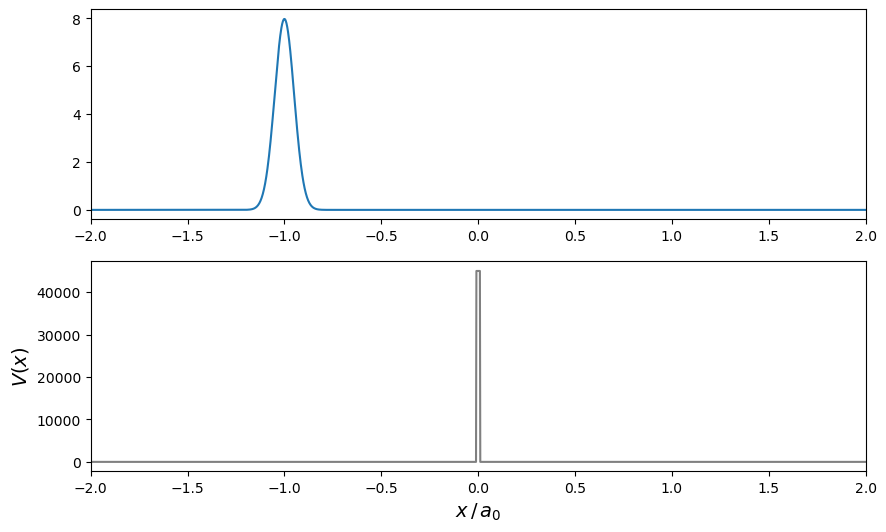

In [51]:
import numpy as np
import matplotlib.pyplot as plt

@np.vectorize
def V(x, t):
    omega=69167
    delta=1.25*1e-3
    
    xv = delta * np.sin(omega * t)  # Modified line
    w = 0.02
    V0 = 45000
    if abs(x - xv) < w/2:
        return V0
    else:
        return 0
xa = -2
xb = 2

# Parameters for the oscillating potential
omega=69167
delta=1.25*1e-3   # Frequency of oscillation

#-- wavefunction at t=0
sigma = 0.05
x0 = -1
k0 = 250.0

Nx = 2000
dx = (xb - xa) / Nx
x = np.linspace(xa, xb, Nx)

# Not shown: Define functions avg_P and avg_x if needed

Vx = V(x, 20000)

psi0 = 1./np.sqrt(sigma * np.sqrt(2*np.pi)) * np.exp(-(x - x0)**2 / (4.*sigma**2.)) * np.exp(1j * k0 * x)
R = np.real(psi0)
I = np.imag(psi0)

print('At t=0, dx = %.6e, k0 = %.2f, <p> = %.3f, <x> = %.2f' %
      (dx, k0, avg_P(x, R, I), avg_x(x, psi0)))

plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
plt.plot(x, np.abs(psi0)**2)
plt.xlim(-2, 2)

plt.subplot(2,1,2)
plt.plot(x, Vx, '-', color='gray')
plt.xlabel(r'$x \, / \, a_0$', fontsize=14)
plt.ylabel(r'$V(x)$', fontsize=14)

plt.xlim(xa, xb)
plt.show()


### FOR K0 550

At t=0, dx = 2.000000e-03, k0 = 550.00, <p> = -526.655, <x> = -1.00
dx = 2.0000e-03, dt = 4.0000e-07, integrating for 20000 time=steps
Storing snapshot  1/20 of the complex wavefunction 
Storing snapshot  2/20 of the complex wavefunction 
Storing snapshot  3/20 of the complex wavefunction 
Storing snapshot  4/20 of the complex wavefunction 
Storing snapshot  5/20 of the complex wavefunction 
Storing snapshot  6/20 of the complex wavefunction 
Storing snapshot  7/20 of the complex wavefunction 
Storing snapshot  8/20 of the complex wavefunction 
Storing snapshot  9/20 of the complex wavefunction 
Storing snapshot 10/20 of the complex wavefunction 
Storing snapshot 11/20 of the complex wavefunction 
Storing snapshot 12/20 of the complex wavefunction 
Storing snapshot 13/20 of the complex wavefunction 
Storing snapshot 14/20 of the complex wavefunction 
Storing snapshot 15/20 of the complex wavefunction 
Storing snapshot 16/20 of the complex wavefunction 
Storing snapshot 17/20 of the com

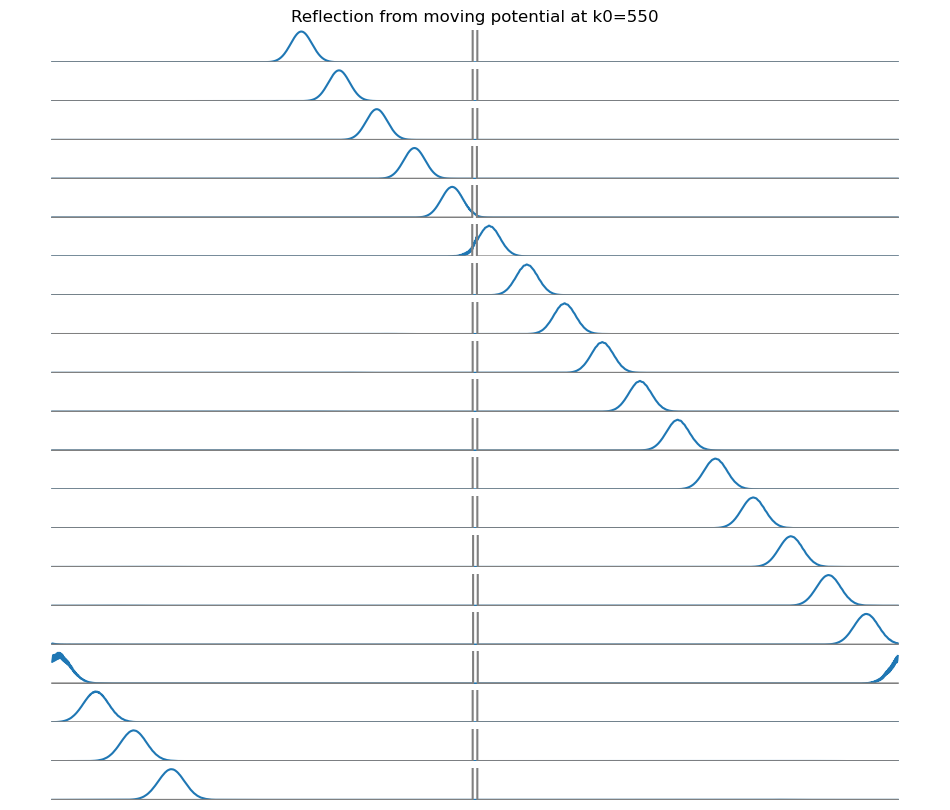

In [52]:
xa = -2
xb = 2

#-- wavefunction at t=0
sigma = 0.05
x0 = -1
k0 = 550.0

Nx=2000
xt=0.5
xr=-0.5
dx=(xb-xa)/Nx
x=np.linspace(xa,xb,Nx)

Vx = V(x,20000)

psi0 = 1./np.sqrt(sigma * np.sqrt(2*np.pi))* np.exp( -((x-x0)**2.)/(4.*sigma**2.) + 1j*k0*x )
R = np.real(psi0)
I = np.imag(psi0)

print('At t=0, dx = %.6e, k0 = %.2f, <p> = %.3f, <x> = %.2f'%
      (dx, k0, avg_P(x, R, I), avg_x(x, psi0) ))
dt = 0.1*(dx**2)
Nt =  20000      # time-steps to integrate over
print('dx = %.4e, dt = %.4e, integrating for %d time=steps'%(dx, dt, Nt))

tfrac = 0.05
Nplots = int(1./tfrac)
psi_t = np.empty((Nplots, len(x)), dtype='complex')

j = 0
Vxs=[V(x,0)]
for i in range(1, Nt+1):

    I_half = I + dIdt(R, Vx, dx) * (dt/2.)  #-- I(t + delta_t/2)
    R = R + dRdt(I_half, Vx, dx) * dt       #-- R(t + delta_t)
    I = I_half + dIdt(R, Vx, dx) * (dt/2.)  #-- I(t + delta_t)
    Vx=V(x,i)
    #psi_t[j,:] = R + 1j*I
   
    if ((i % int(tfrac*Nt)) == 0):
        print('Storing snapshot %2d/%2d of the complex wavefunction '%(j+1, Nplots))
        psi_t[j,:] = R + 1j*I
        Vxs.append(Vx)
        j = j+1 #-- prepare for next snapshot
        
#-- Plot the wavefunctions psi(x, t) recorded at different instances
plt.figure(figsize=(12,10))

for j in range(Nplots):
    ax = plt.subplot(Nplots, 1, j+1)

    #-- remove all axis
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    for spine in ['top', 'right', 'left', 'bottom']:
        ax.spines[spine].set_visible(False)
    ax.set_ylim(-0.02, 1.05*np.max(np.abs(psi_t[j,:])**2))
    
    #-- set the title for the first subplot
    if (j==0):
        plt.title('Reflection from moving potential at k0=550')
        
    #-- plot |psi(t)|^2
    ax.plot(x, np.abs(psi_t[j,:])**2)

    #-- mark the position of the cliff
    ax.plot(x,Vxs[j], color='gray')
   


plt.show()

In [53]:
#-- add psi0 to the top of the stack of \psi(t)
psi_t = np.vstack((psi0, psi_t))

for j in range(len(psi_t)):
    norm = integrate.simps(np.abs(psi_t[j,:])**2, x)
    avgX = avg_x(x, np.real(psi_t[j,:]) + 1j*np.imag(psi_t[j,:]))
    avgP = avg_P(x, np.real(psi_t[j,:]), np.imag(psi_t[j,:]))

    print ('%2d \t norm = %.2e <x> = %.3e, <p> = %4.2f'%(j+1, norm, avgX, avgP))

 1 	 norm = 1.00e+00 <x> = -1.000e+00, <p> = -526.66
 2 	 norm = 1.00e+00 <x> = -8.216e-01, <p> = -526.66
 3 	 norm = 1.00e+00 <x> = -6.432e-01, <p> = -526.66
 4 	 norm = 1.00e+00 <x> = -4.648e-01, <p> = -526.66
 5 	 norm = 1.00e+00 <x> = -2.864e-01, <p> = -526.66
 6 	 norm = 1.00e+00 <x> = -1.080e-01, <p> = -524.88
 7 	 norm = 1.00e+00 <x> = 6.704e-02, <p> = -515.21
 8 	 norm = 1.00e+00 <x> = 2.435e-01, <p> = -521.52
 9 	 norm = 1.00e+00 <x> = 4.201e-01, <p> = -521.52
10 	 norm = 1.00e+00 <x> = 5.968e-01, <p> = -521.52
11 	 norm = 1.00e+00 <x> = 7.734e-01, <p> = -521.52
12 	 norm = 1.00e+00 <x> = 9.501e-01, <p> = -521.52
13 	 norm = 1.00e+00 <x> = 1.127e+00, <p> = -521.52
14 	 norm = 1.00e+00 <x> = 1.303e+00, <p> = -521.52
15 	 norm = 1.00e+00 <x> = 1.480e+00, <p> = -521.52
16 	 norm = 1.00e+00 <x> = 1.657e+00, <p> = -521.52
17 	 norm = 9.99e-01 <x> = 1.814e+00, <p> = -521.24
18 	 norm = 9.87e-01 <x> = -7.227e-01, <p> = -515.28
19 	 norm = 1.00e+00 <x> = -1.775e+00, <p> = -521.50
20 	

In [54]:
def current_density(psi, x, x_ref):
    ax = psi
    bx = np.gradient(psi, x)
    idx = np.argmin(np.abs(x - x_ref))
    j = 0.5 * np.imag(np.conj(ax[idx]) * bx[idx] - ax[idx] * np.conj(bx[idx]))
    return j

j_trans = []
j_refl = []

for i in range(0,Nplots + 1):
    j_trans.append(current_density(psi_t[i, :], x, xt))
    j_refl.append(current_density(psi_t[i, :], x, xr))
    
t = [i * dt for i in range(Nt + 1)]
t1 = [t[i] for i in range(len(t)) if (i % int(tfrac * Nt)) == 0]

transmission_probability = integrate.simps(j_trans, t1)
reflection_probability = 1 - transmission_probability

print("Transmission Probability:", transmission_probability)
print("Reflection Probability:", reflection_probability)
print("Total Probability:", transmission_probability + reflection_probability)

Transmission Probability: 0.574825499006853
Reflection Probability: 0.425174500993147
Total Probability: 1.0
